In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df=pd.read_csv('house_price.csv')
df
pd.set_option('display.float_format', lambda x:'%3f' % x)

In [3]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.000000,2.000000,39.070000,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.000000,5.000000,120.000000,4,4615
2,Uttarahalli,3 BHK,1440.000000,2.000000,62.000000,3,4305
3,Lingadheeranahalli,3 BHK,1521.000000,3.000000,95.000000,3,6245
4,Kothanur,2 BHK,1200.000000,2.000000,51.000000,2,4250


In [7]:
df.tail()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
13195,Whitefield,5 Bedroom,3453.000000,4.000000,231.000000,5,6689
13196,other,4 BHK,3600.000000,5.000000,400.000000,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.000000,2.000000,60.000000,2,5258
13198,Padmanabhanagar,4 BHK,4689.000000,4.000000,488.000000,4,10407
13199,Doddathoguru,1 BHK,550.000000,1.000000,17.000000,1,3090


In [9]:
df.iloc[30:40]

,location,size,total_sqft,bath,price,bhk,price_per_sqft
30,Yelahanka,4 BHK,2475.000000,4.000000,186.000000,4,7515
31,Bisuvanahalli,3 BHK,1075.000000,2.000000,35.000000,3,3255
32,Hebbal,3 BHK,1760.000000,2.000000,123.000000,3,6988
33,Raja Rajeshwari Nagar,3 BHK,1693.000000,3.000000,57.390000,3,3389
34,Kasturi Nagar,3 BHK,1925.000000,3.000000,125.000000,3,6493
35,Kanakpura Road,2 BHK,700.000000,2.000000,36.000000,2,5142
36,Electronics City Phase 1,2 BHK,1070.000000,2.000000,45.500000,2,4252
37,Kundalahalli,3 BHK,1724.000000,3.000000,125.000000,3,7250
38,Chikkalasandra,3 BHK,1290.000000,2.000000,56.120000,3,4350
39,Uttarahalli,2 BHK,1143.000000,2.000000,45.000000,2,3937


In [11]:
df.columns

Index(['location', 'size', 'total_sqft', 'bath', 'price', 'bhk',
       'price_per_sqft'],
      dtype='object')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB


In [15]:
df.isnull().sum()

location          0
size              0
total_sqft        0
bath              0
price             0
bhk               0
price_per_sqft    0
dtype: int64

In [17]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,1555.302783,2.691136,112.276178,2.800833,7920.336742
std,1237.323445,1.338915,149.175995,1.292843,106727.160328
min,1.000000,1.000000,8.000000,1.000000,267.000000
25%,1100.000000,2.000000,50.000000,2.000000,4267.000000
50%,1275.000000,2.000000,71.850000,3.000000,5438.000000
75%,1672.000000,3.000000,120.000000,3.000000,7317.000000
max,52272.000000,40.000000,3600.000000,43.000000,12000000.000000


In [19]:
len(df)

13200

In [21]:
df.drop(columns = ['size'],inplace = True)

In [23]:
df.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.000000,2.000000,39.070000,2,3699
1,Chikka Tirupathi,2600.000000,5.000000,120.000000,4,4615
2,Uttarahalli,1440.000000,2.000000,62.000000,3,4305
3,Lingadheeranahalli,1521.000000,3.000000,95.000000,3,6245
4,Kothanur,1200.000000,2.000000,51.000000,2,4250


In [25]:
 df.price_per_sqft.describe()

count      13200.000000
mean        7920.336742
std       106727.160328
min          267.000000
25%         4267.000000
50%         5438.000000
75%         7317.000000
max     12000000.000000
Name: price_per_sqft, dtype: float64

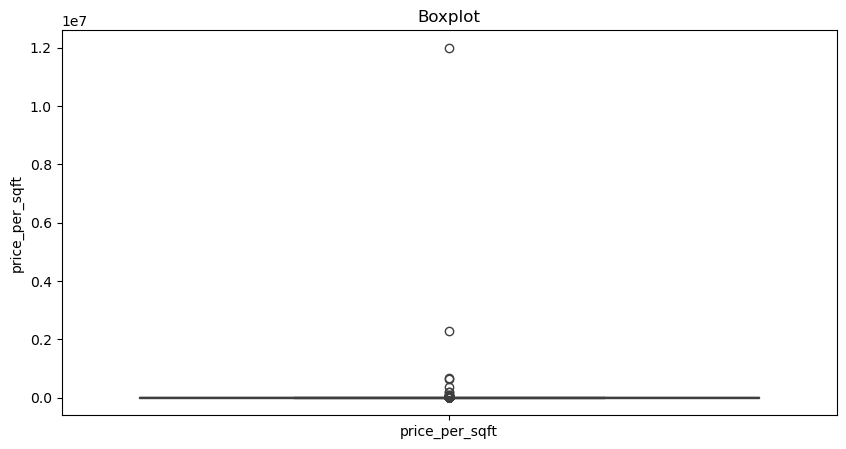

In [27]:
# Before transfromation
num_values = ['price_per_sqft']
plt.figure(figsize =(10,5)) 
sns.boxplot(data =df[num_values])
plt.title('Boxplot')
plt.ylabel('price_per_sqft')
plt.show()

Mean and standard deviation method

In [30]:
mean_price = df['price_per_sqft'].mean()
std_price = df['price_per_sqft'].std ()
medain_price = df['price_per_sqft'].median()
print('The mean of price per sqft is ',mean_price)
print('The standerd deviation of price per sqft is ',std_price)
print('The median of price per sqft is ',medain_price)
# finding the upper limit and lower limit
lower_limit =mean_price-3*std_price
upper_limit =mean_price+3*std_price

print('The Upper limit of price per sqft is ',upper_limit)
print('The Lower limit of price per sqft is ',lower_limit)
outliers = df[(df['price_per_sqft']<lower_limit) | (df['price_per_sqft']>upper_limit)]
# After trimming outliers
outliers1 = df[(df['price_per_sqft']>lower_limit) & (df['price_per_sqft']<upper_limit)]
print(outliers['price_per_sqft'])
print(outliers1['price_per_sqft'])
print( 'After removing outliers =',len(outliers))
print('Before removing outliers =', len(df))
print ('Balance amount of outliers =',(len(df)-len(outliers)))
                                

The mean of price per sqft is  7920.336742424242
The standerd deviation of price per sqft is  106727.16032810845
The median of price per sqft is  5438.0
The Upper limit of price per sqft is  328101.8177267496
The Lower limit of price per sqft is  -312261.1442419011
345        672727
1106       625000
4044     12000000
4924      2300000
11447      363333
Name: price_per_sqft, dtype: int64
0         3699
1         4615
2         4305
3         6245
4         4250
         ...  
13195     6689
13196    11111
13197     5258
13198    10407
13199     3090
Name: price_per_sqft, Length: 13195, dtype: int64
After removing outliers = 5
Before removing outliers = 13200
Balance amount of outliers = 13195


In [32]:
outliers1.price_per_sqft.describe()

count    13195.000000
mean      6713.708602
std       4876.727718
min        267.000000
25%       4266.500000
50%       5434.000000
75%       7313.000000
max     200000.000000
Name: price_per_sqft, dtype: float64

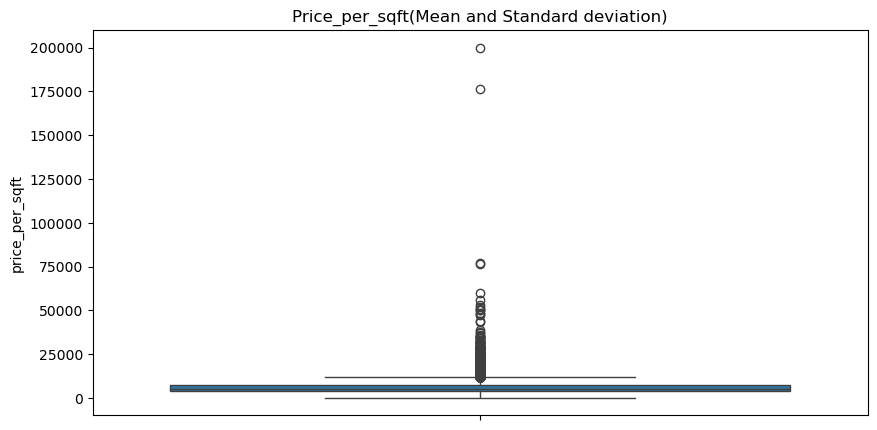

In [34]:
plt.figure(figsize = (10,5))
sns.boxplot(data =outliers1['price_per_sqft'])
plt.title('Price_per_sqft(Mean and Standard deviation)')
plt.ylabel('price_per_sqft')
plt.show()

percentile method

In [37]:
Q1 = df['price_per_sqft'].quantile(0.05)
Q3 = df['price_per_sqft'].quantile(0.95)

print(Q1)
print(Q3)

p_method = df[(df['price_per_sqft']<=Q1) | (df['price_per_sqft']>=Q3)]
p_method1 = df[(df['price_per_sqft']>=Q1) & (df['price_per_sqft']<=Q3)]

print('The outliers in percentile method :', p_method['price_per_sqft'])
print(p_method1['price_per_sqft'])
print('Before removing outliers =',len(df))
print('After removing outliers =',len(p_method))
print(' Remaining data =',(len(df)-len(p_method)))


3107.8500000000004
15312.099999999984
The outliers in percentile method : 7        18181
9        36274
20        2500
41        3030
45       33333
         ...  
13157    15571
13185    44000
13186    27083
13191    16666
13199     3090
Name: price_per_sqft, Length: 1320, dtype: int64
0         3699
1         4615
2         4305
3         6245
4         4250
         ...  
13194     6530
13195     6689
13196    11111
13197     5258
13198    10407
Name: price_per_sqft, Length: 11880, dtype: int64
Before removing outliers = 13200
After removing outliers = 1320
 Remaining data = 11880


In [39]:
p_method.price_per_sqft.describe()

count       1320.000000
mean       23992.675000
std       337106.519842
min          267.000000
25%         2887.000000
50%         9219.000000
75%        18750.000000
max     12000000.000000
Name: price_per_sqft, dtype: float64

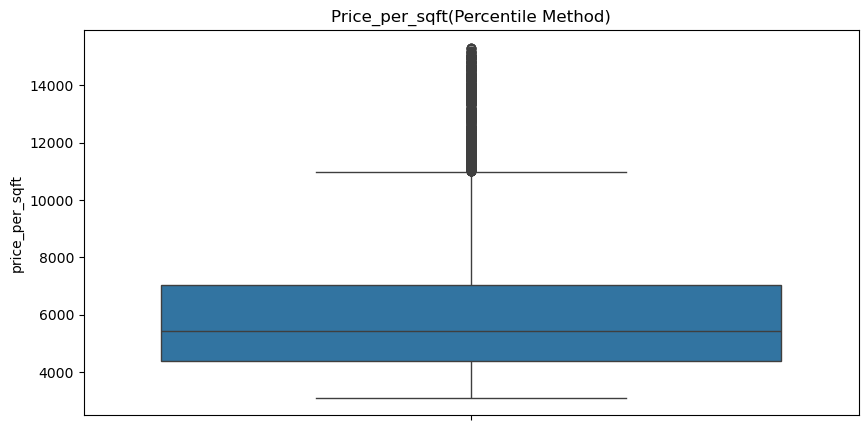

In [41]:
plt.figure(figsize = (10,5))
sns.boxplot(data =p_method1['price_per_sqft'])
plt.title('Price_per_sqft(Percentile Method)')
plt.ylabel('price_per_sqft')
plt.show()

IQR method

In [44]:
q1 = df['price_per_sqft'].quantile(0.25)
q3 = df['price_per_sqft'].quantile(0.75)
print('Q1 is = ',q1)
print(' Q3 is =',q3)
iqr = q3-q1
print('IQR is = ',iqr)

lower_bound = q1-1.5*iqr
upper_bound = q3+1.5*iqr

print ('Lower bound =',lower_bound)
print ('Upper bound =',upper_bound)

iqr_method = df.loc[(df['price_per_sqft']<=lower_bound) | (df['price_per_sqft']>=upper_bound)]
iqr_method1 = df.loc[(df['price_per_sqft']>=lower_bound) & (df['price_per_sqft']<=upper_bound)]

print ('Outliers using IQR method :',iqr_method['price_per_sqft'])

print(iqr_method1['price_per_sqft'])

Q1 is =  4267.0
 Q3 is = 7317.0
IQR is =  3050.0
Lower bound = -308.0
Upper bound = 11892.0
Outliers using IQR method : 7        18181
9        36274
22       13571
45       33333
48       16250
         ...  
13142    16228
13157    15571
13185    44000
13186    27083
13191    16666
Name: price_per_sqft, Length: 1265, dtype: int64
0         3699
1         4615
2         4305
3         6245
4         4250
         ...  
13195     6689
13196    11111
13197     5258
13198    10407
13199     3090
Name: price_per_sqft, Length: 11935, dtype: int64


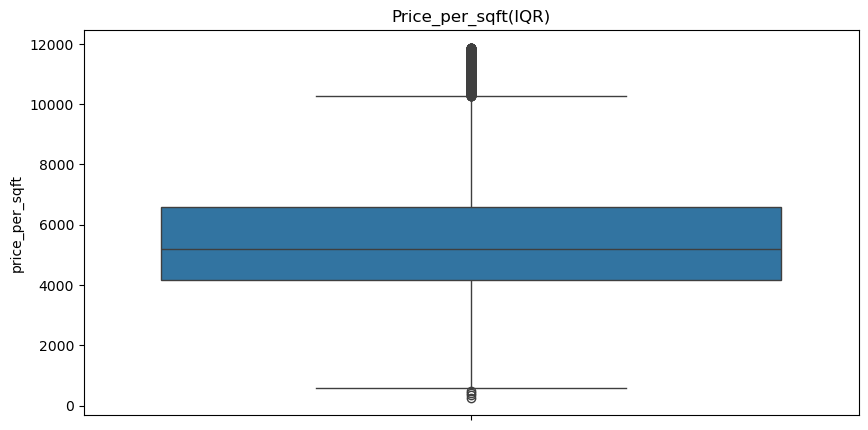

In [46]:
plt.figure(figsize = (10,5))
sns.boxplot(data =iqr_method1['price_per_sqft'])
plt.title('Price_per_sqft(IQR)')
plt.ylabel('price_per_sqft')
plt.show()

Z_score Method

In [49]:
z_method = stats.zscore(df['price_per_sqft'])
z_method

0       -0.039554
1       -0.030971
2       -0.033876
3       -0.015698
4       -0.034391
           ...   
13195   -0.011538
13196    0.029897
13197   -0.024946
13198    0.023300
13199   -0.045260
Name: price_per_sqft, Length: 13200, dtype: float64

In [51]:
z_score = df[(z_method<-3) | (z_method>3)]
z_score1 = df[(z_method>-3) & (z_method<3)]
print(z_score1['price_per_sqft'])
print ('The outliers in zscore method :',z_score['price_per_sqft'])
print('The legth of outliers before using z_score method =',len(df))
print('The legth of outliers after using z_score method =',len(z_score))
print('Remaining data =',(len(df)-len(z_score)))


0         3699
1         4615
2         4305
3         6245
4         4250
         ...  
13195     6689
13196    11111
13197     5258
13198    10407
13199     3090
Name: price_per_sqft, Length: 13195, dtype: int64
The outliers in zscore method : 345        672727
1106       625000
4044     12000000
4924      2300000
11447      363333
Name: price_per_sqft, dtype: int64
The legth of outliers before using z_score method = 13200
The legth of outliers after using z_score method = 5
Remaining data = 13195


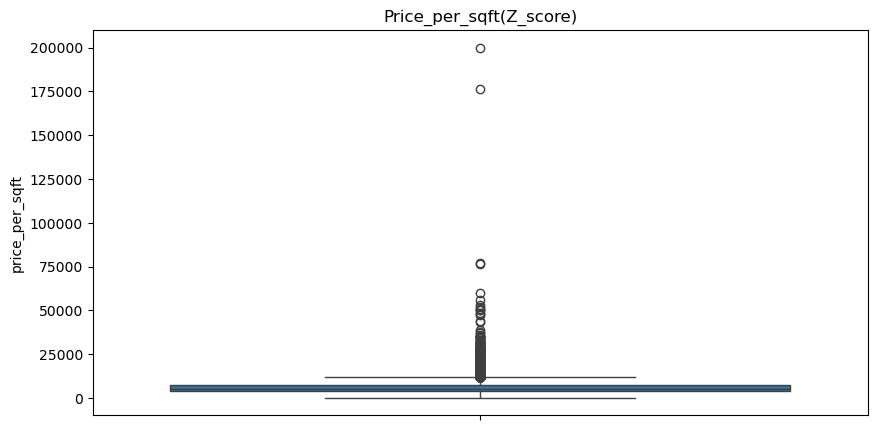

In [53]:
plt.figure(figsize = (10,5))
sns.boxplot(data =z_score1['price_per_sqft'])
plt.title('Price_per_sqft(Z_score)')
plt.ylabel('price_per_sqft')
plt.show()

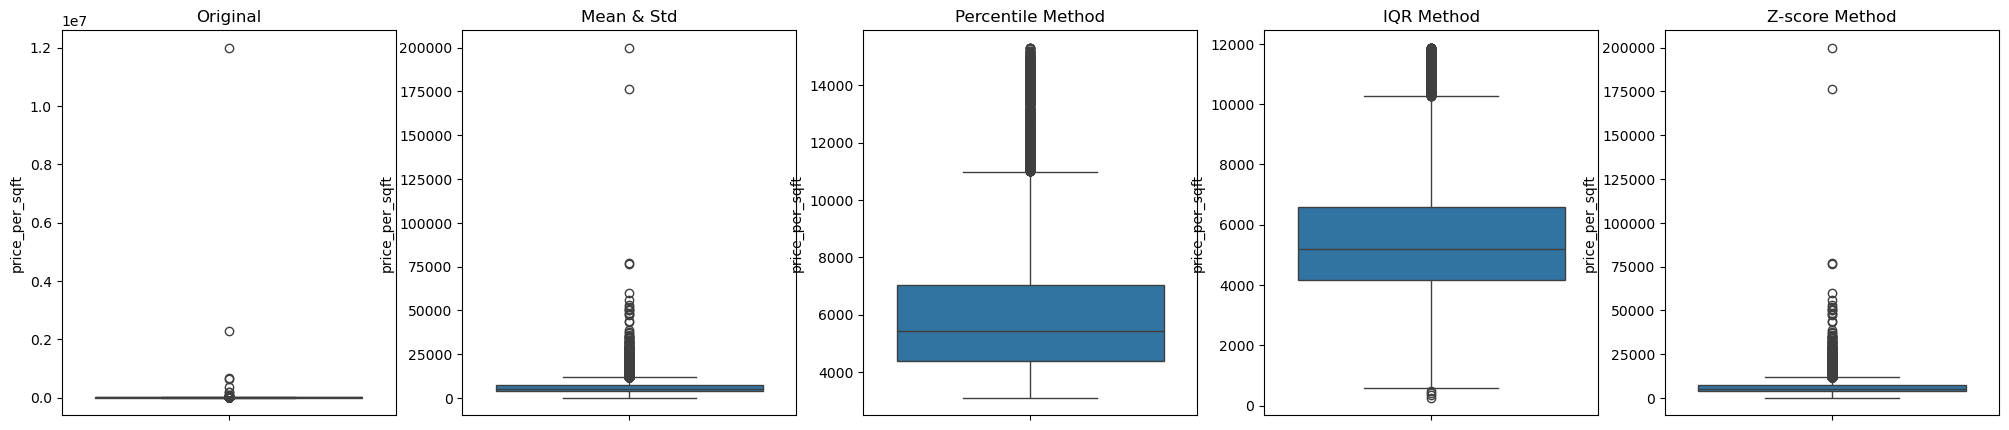

In [55]:
fig, axes=plt.subplots(1,5 ,figsize = (25,5))
sns.boxplot(data=df['price_per_sqft'], ax=axes[0]).set_title('Original')
sns.boxplot(data=outliers1['price_per_sqft'], ax=axes[1]).set_title('Mean & Std')
sns.boxplot(data=p_method1['price_per_sqft'], ax=axes[2]).set_title('Percentile Method')
sns.boxplot(data=iqr_method1['price_per_sqft'], ax=axes[3]).set_title('IQR Method')
sns.boxplot(data=z_score1['price_per_sqft'], ax=axes[4]).set_title('Z-score Method')
plt.ylabel('price_per_sqft')
plt.show()

Based on findings -
The best way to remove the outliers are Percentile and IQR method compared with other methods.

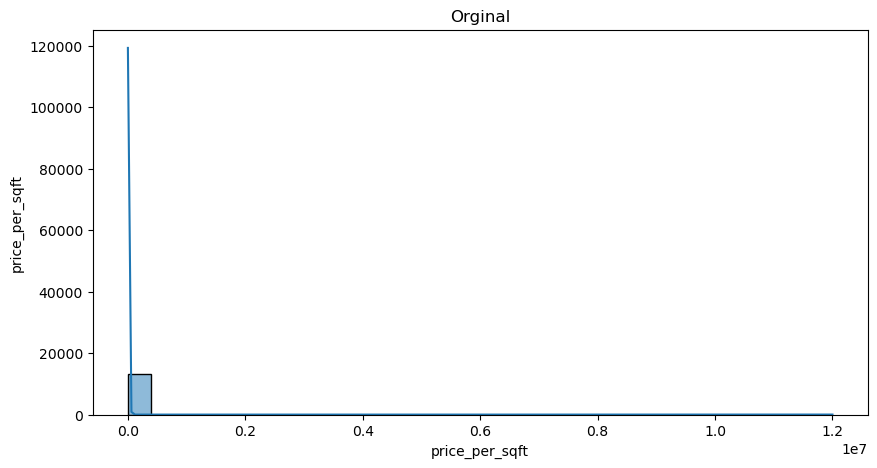

In [58]:
plt.figure(figsize=(10,5))
sns.histplot(data=df['price_per_sqft'],kde = True,bins =30)
plt.title('Orginal')
plt.ylabel('price_per_sqft')
plt.show()

In [60]:
# finding sknewness
df.price_per_sqft.skew()

108.28105529705168

In [62]:
# finding Kurtosis
df.price_per_sqft.kurtosis()

12095.21502832288

In [64]:
df['new_price_per_sqft'] = np.log1p(df['price_per_sqft'])
print(df[['new_price_per_sqft']].apply(stats.skew))
print(df[['new_price_per_sqft']].apply(stats.kurtosis))

new_price_per_sqft   1.400326
dtype: float64
new_price_per_sqft   9.203001
dtype: float64


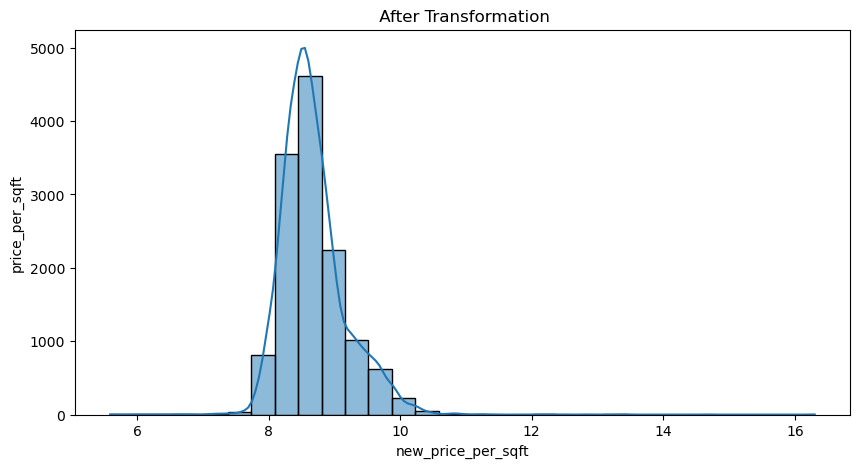

In [66]:
plt.figure(figsize=(10,5))
sns.histplot(data=df['new_price_per_sqft'],kde = True,bins =30)
plt.title(' After Transformation')
plt.ylabel('price_per_sqft')
plt.show()

In [80]:
df

,location,total_sqft,bath,price,bhk,price_per_sqft,new_price_per_sqft
0,Electronic City Phase II,1056.000000,2.000000,39.070000,2,3699,8.216088
1,Chikka Tirupathi,2600.000000,5.000000,120.000000,4,4615,8.437284
2,Uttarahalli,1440.000000,2.000000,62.000000,3,4305,8.367765
3,Lingadheeranahalli,1521.000000,3.000000,95.000000,3,6245,8.739697
4,Kothanur,1200.000000,2.000000,51.000000,2,4250,8.354910
...,...,...,...,...,...,...,...
13195,Whitefield,3453.000000,4.000000,231.000000,5,6689,8.808369
13196,other,3600.000000,5.000000,400.000000,4,11111,9.315781
13197,Raja Rajeshwari Nagar,1141.000000,2.000000,60.000000,2,5258,8.567696
13198,Padmanabhanagar,4689.000000,4.000000,488.000000,4,10407,9.250330


In [84]:
columns = df[['total_sqft', 'bath', 'price', 'bhk', 'price_per_sqft']]
columns.head()
correlation = columns.corr()
correlation

,total_sqft,bath,price,bhk,price_per_sqft
total_sqft,1.000000,0.392743,0.574330,0.346013,-0.008267
bath,0.392743,1.000000,0.455998,0.897951,0.030883
price,0.574330,0.455998,1.000000,0.396883,0.028387
bhk,0.346013,0.897951,0.396883,1.000000,0.030955
price_per_sqft,-0.008267,0.030883,0.028387,0.030955,1.000000


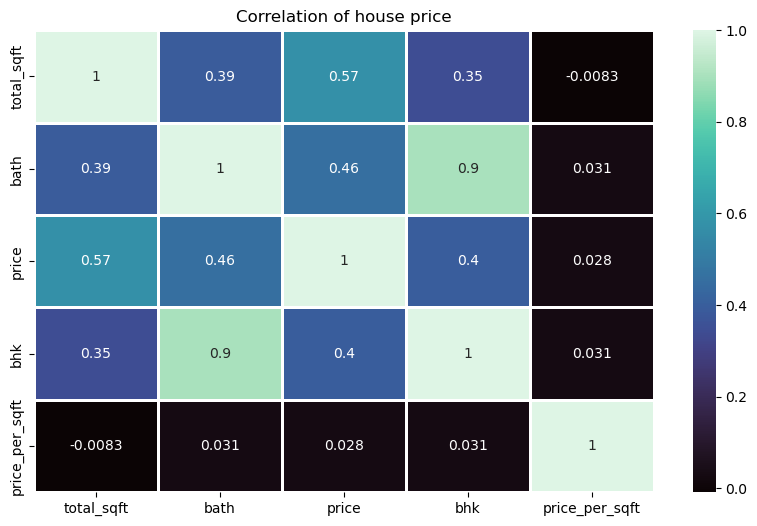

In [86]:
plt.figure(figsize = (10,6))
sns.heatmap(data = correlation,annot=True,cmap ='mako',linewidth = 1.0)
plt.title('Correlation of house price')
plt.show()

Scatter plot

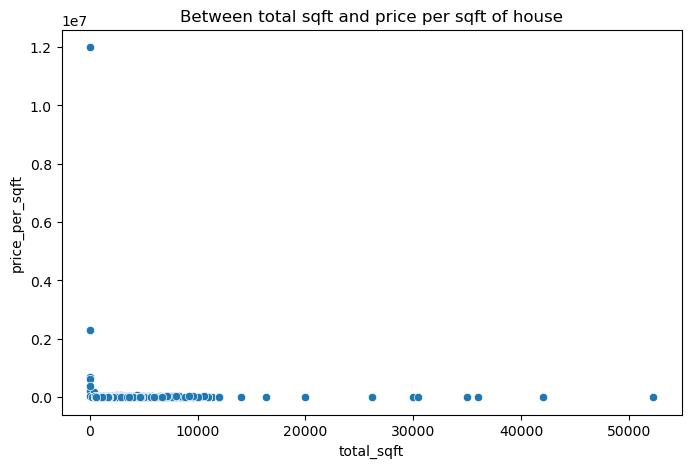

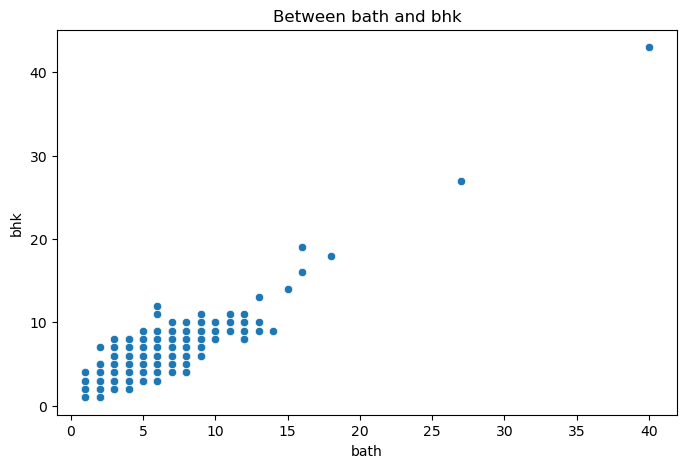

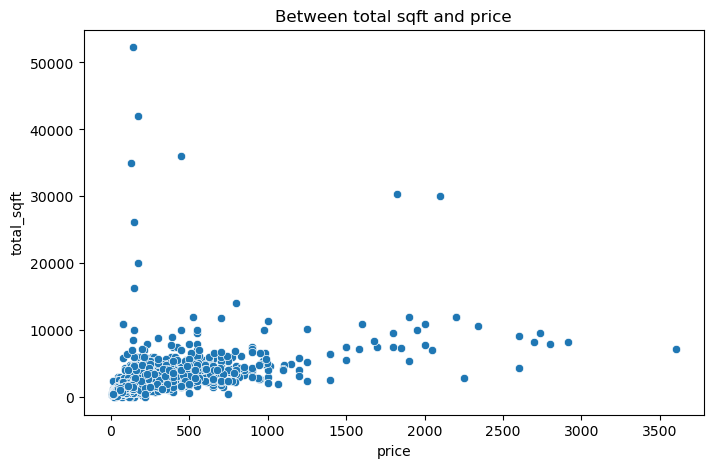

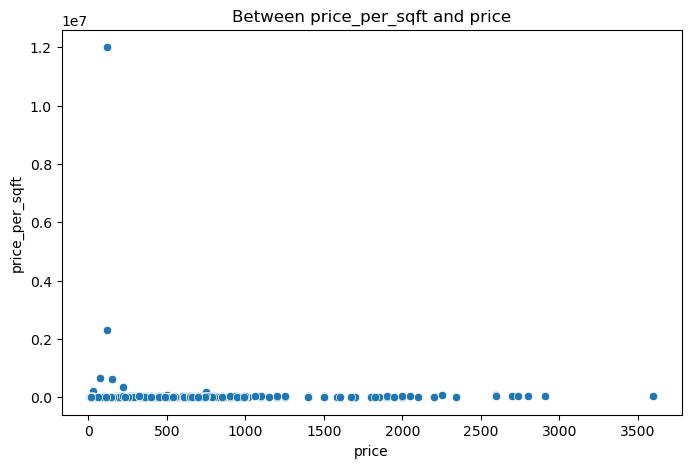

In [98]:
plt.figure(figsize = (8,5))
sns.scatterplot( data = df,x='total_sqft',y = 'price_per_sqft')
plt.title('Between total sqft and price per sqft of house')
plt.show()

plt.figure(figsize = (8,5))
sns.scatterplot( data = df,x='bath',y = 'bhk')
plt.title('Between bath and bhk')
plt.show()

plt.figure(figsize = (8,5))
sns.scatterplot( data = df,x='price',y = 'total_sqft')
plt.title('Between total sqft and price')
plt.show()


plt.figure(figsize = (8,5))
sns.scatterplot( data = df,x='price',y = 'price_per_sqft')
plt.title('Between price_per_sqft and price')
plt.show()